## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [117]:
# Your code here
DF = pd.read_csv('mapdataall.csv')
show(DF)

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

In [120]:
# You will need to write some code to answer the questions.
DF.shape
#variables = 23, observations = 2728 

(2728, 23)

In [122]:
#how many different types of incidents are there?
my_columns=['incident_name']
DF[my_columns].value_counts('incident_name')
#1820 different types of fire incidents

incident_name
Creek Fire       23
Oak Fire         16
Canyon Fire      16
Lake Fire        14
Coyote Fire      12
                 ..
Gover Fire        1
Gorgonio Fire     1
Gorge Fire        1
Goose 2 Fire      1
Zogg Fire         1
Name: count, Length: 1820, dtype: int64

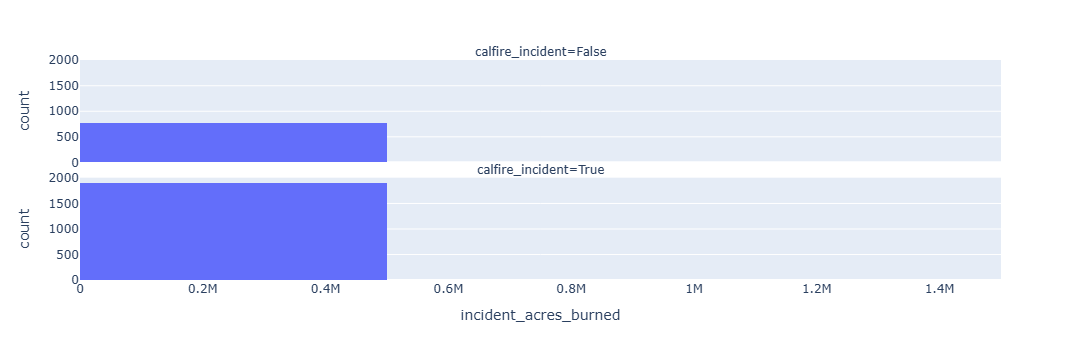

In [124]:
#make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. make a mask and remove very small and very big fires. 
dog = px.histogram(DF,
                   x='incident_acres_burned',
                   nbins=3,
                  facet_col='calfire_incident',
                  facet_col_wrap=1)
dog.show()

In [126]:
# how many fires burned more than 100k acres? 
mask = (DF['incident_acres_burned']>=100000) 
DF_final = DF[mask]
len(DF_final)
show(DF_final)
# 20 fires burned more than 100k acres

In [128]:
# what is the largest fire in the data?
my_columns=['incident_acres_burned', 'incident_name']
DF[my_columns].groupby('incident_acres_burned').max()
# the largest fire burned 1032648. it was the August Complex (includes Doe Fire)

,incident_name
incident_acres_burned,
0.0,Washington Fire
2.0,Valley Fire
3.0,Bichota Fire
5.0,Stanley Fire
6.0,Rios Fire
...,...
396624.0,SCU Lightning Complex
410203.0,Ranch Fire (Mendocino Complex)
429603.0,Park Fire


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [178]:
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
show(DF_raw)

In [180]:
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [190]:
# Your code here
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,979
1,2,156
2,3,77
3,4,47
4,0 (1),32
5,5,25
6,7,12
7,6,12
8,1 (1),8
9,8,7


In [196]:
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

AttributeError: 'int' object has no attribute 'split'

**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [188]:
nom_data = DF_raw['Nominations'].value_counts()
DF_nom = nom_data.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_nom)
print('I can see that I want the data to the left of the [ character')

DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
show(DF_award)

DF_raw.dtypes

I can see that I want the data to the left of the [ character


AttributeError: 'int' object has no attribute 'split'

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [145]:
my_website = "https://goredlands.com/sports/baseball/stats"
DF = pd.read_html(my_website)
DF_raw = DF[0]
show(DF_raw)

In [147]:
DF_raw.shape

(24, 23)

In [149]:
# 24 observations and 23 variables

In [151]:
my_website = "https://goredlands.com/sports/baseball/stats"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw.describe()
show(DF_raw)

In [157]:
# Using the describe() command just gives me the same data table as before. The data doesn't really need to be fixed anywhere. It comes out just how it was on the website. 

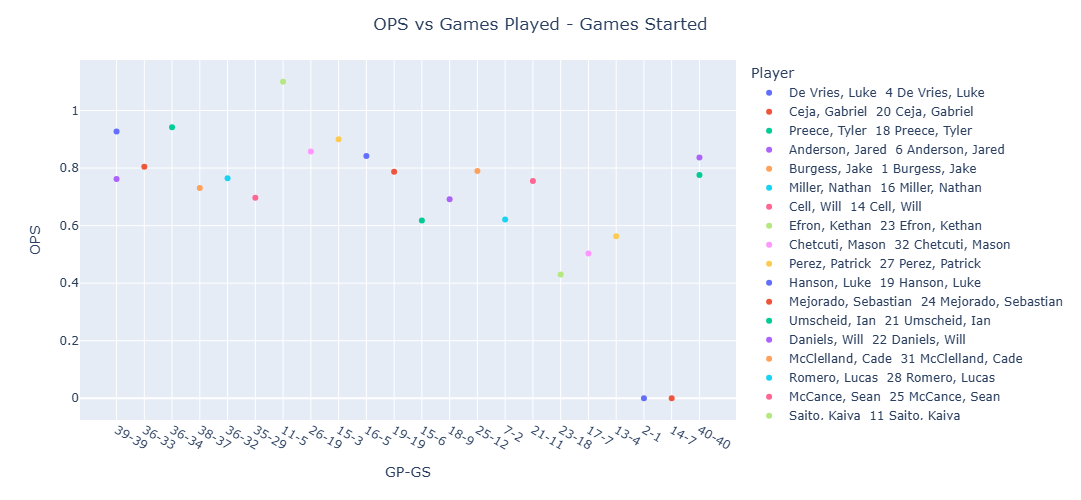

In [170]:
fig = px.scatter(DF_raw,
                 x='GP-GS',
                 y='OPS',
                 color = 'Player')

fig.update_layout(title='OPS vs Games Played - Games Started',
                  title_x=0.5,
                  xaxis_title="GP-GS",
                  yaxis_title="OPS",
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()